In [60]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [62]:
df = pd.read_csv("C:\\Users\\Hemanth\\sem3\\moc\\features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [64]:
df.shape

(1000, 60)

In [66]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [68]:
# Finding misssing values
# Find all columns with any NA values
print("Columns containing missing values",list(df.columns[df.isnull().any()]))

Columns containing missing values []


In [70]:
class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [72]:
#features
print(df.iloc[:,:-1])

            filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0    blues.00000.wav  661794          0.350088         0.088757  0.130228   
1    blues.00001.wav  661794          0.340914         0.094980  0.095948   
2    blues.00002.wav  661794          0.363637         0.085275  0.175570   
3    blues.00003.wav  661794          0.404785         0.093999  0.141093   
4    blues.00004.wav  661794          0.308526         0.087841  0.091529   
..               ...     ...               ...              ...       ...   
995   rock.00095.wav  661794          0.352063         0.080487  0.079486   
996   rock.00096.wav  661794          0.398687         0.075086  0.076458   
997   rock.00097.wav  661794          0.432142         0.075268  0.081651   
998   rock.00098.wav  661794          0.362485         0.091506  0.083860   
999   rock.00099.wav  661794          0.358401         0.085884  0.054454   

      rms_var  spectral_centroid_mean  spectral_centroid_var  \
0    0.0028

In [74]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels="filename",axis=1)

In [76]:
#scaling
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:,:-1],dtype=float))

In [96]:
# splitting 70% data into training set and the remaining 30% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [98]:
# test data size
len(y_test)

300

In [100]:
# size of training data
len(y_train)

700

Training set score: 0.877
Test set score: 0.727
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        34
           1       0.88      0.88      0.88        33
           2       0.80      0.67      0.73        24
           3       0.50      0.57      0.53        30
           4       0.82      0.56      0.67        32
           5       0.78      0.83      0.81        30
           6       0.80      0.97      0.88        33
           7       0.84      0.75      0.79        28
           8       0.57      0.82      0.68        28
           9       0.48      0.39      0.43        28

    accuracy                           0.73       300
   macro avg       0.73      0.72      0.72       300
weighted avg       0.74      0.73      0.72       300



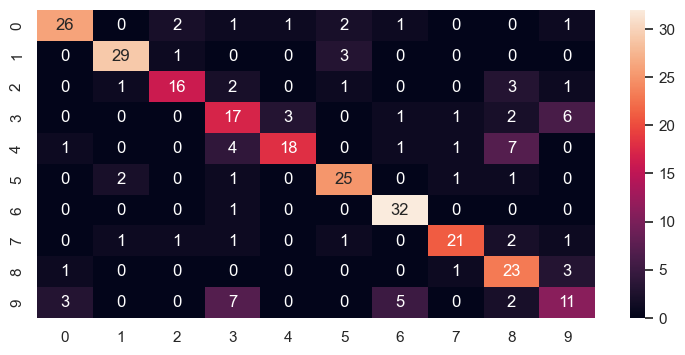

In [120]:
# Applying Support Vector Machines to predict the results
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

Training set score: 0.984
Test set score: 0.683
              precision    recall  f1-score   support

           0       0.63      0.79      0.70        34
           1       0.94      0.88      0.91        33
           2       0.50      0.46      0.48        24
           3       0.47      0.57      0.52        30
           4       0.67      0.62      0.65        32
           5       0.85      0.77      0.81        30
           6       0.91      0.88      0.89        33
           7       0.81      0.75      0.78        28
           8       0.61      0.68      0.64        28
           9       0.41      0.32      0.36        28

    accuracy                           0.68       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.69      0.68      0.68       300



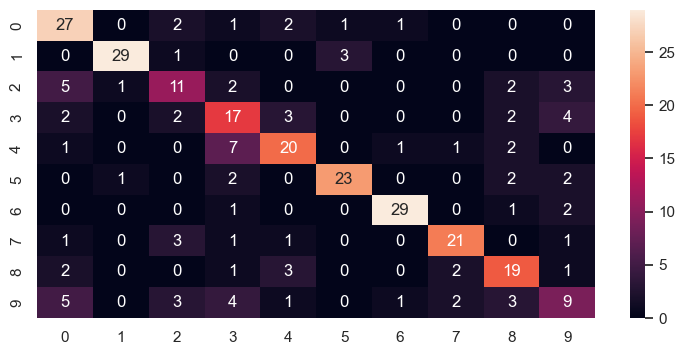

In [112]:
# Applying Support Vector Machines to predict the results
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

Training set score: 0.637
Test set score: 0.583
              precision    recall  f1-score   support

           0       0.39      0.38      0.39        34
           1       0.87      0.79      0.83        33
           2       0.53      0.42      0.47        24
           3       0.41      0.40      0.41        30
           4       0.62      0.31      0.42        32
           5       0.69      0.67      0.68        30
           6       0.56      0.94      0.70        33
           7       0.82      0.82      0.82        28
           8       0.61      0.82      0.70        28
           9       0.30      0.25      0.27        28

    accuracy                           0.58       300
   macro avg       0.58      0.58      0.57       300
weighted avg       0.58      0.58      0.57       300



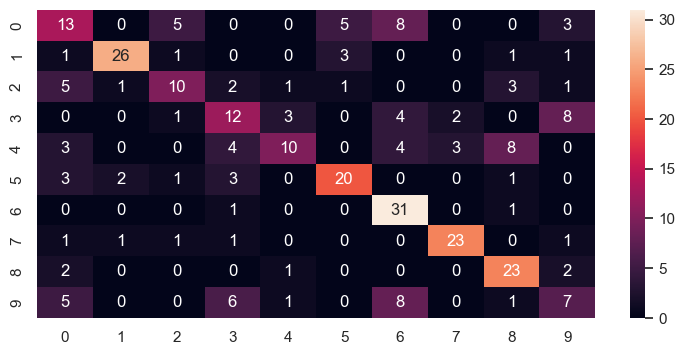

In [116]:
# Applying Support Vector Machines to predict the results
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))

Training set score: 0.744
Test set score: 0.593
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        34
           1       0.97      0.85      0.90        33
           2       0.24      0.88      0.38        24
           3       0.32      0.47      0.38        30
           4       0.82      0.28      0.42        32
           5       0.84      0.70      0.76        30
           6       0.88      0.85      0.86        33
           7       0.90      0.64      0.75        28
           8       0.76      0.57      0.65        28
           9       0.47      0.25      0.33        28

    accuracy                           0.59       300
   macro avg       0.72      0.60      0.61       300
weighted avg       0.74      0.59      0.62       300



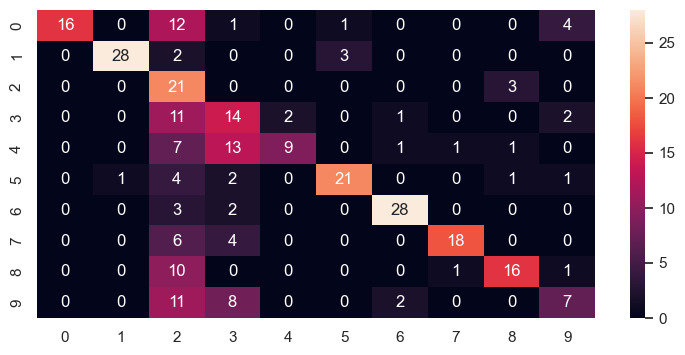

In [118]:
# Applying Support Vector Machines to predict the results
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
print("Training set score: {:.3f}".format(svclassifier.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svclassifier.score(X_test, y_test)))
y_pred = svclassifier.predict(X_test)
cf_matrix3 = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(9,4)})
sns.heatmap(cf_matrix3, annot=True)
print(classification_report(y_test, y_pred))